Hard Cut Detected at Frame 1


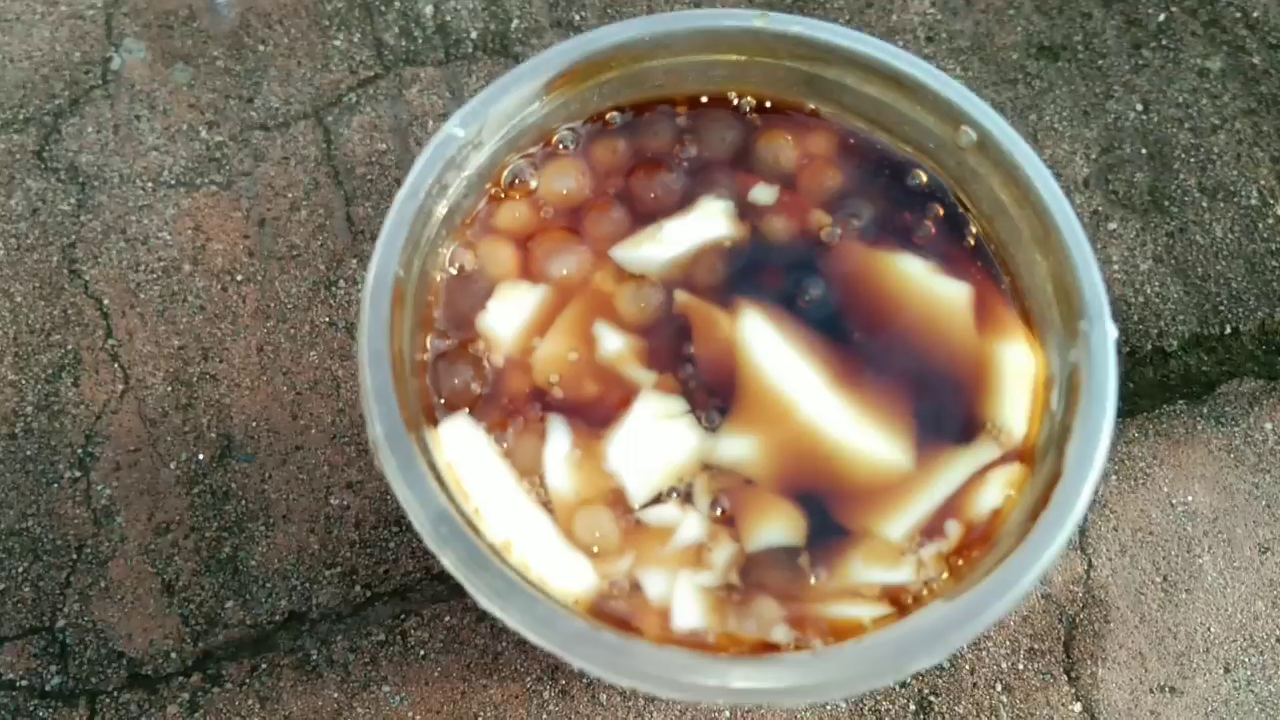

Hard Cut Detected at Frame 89


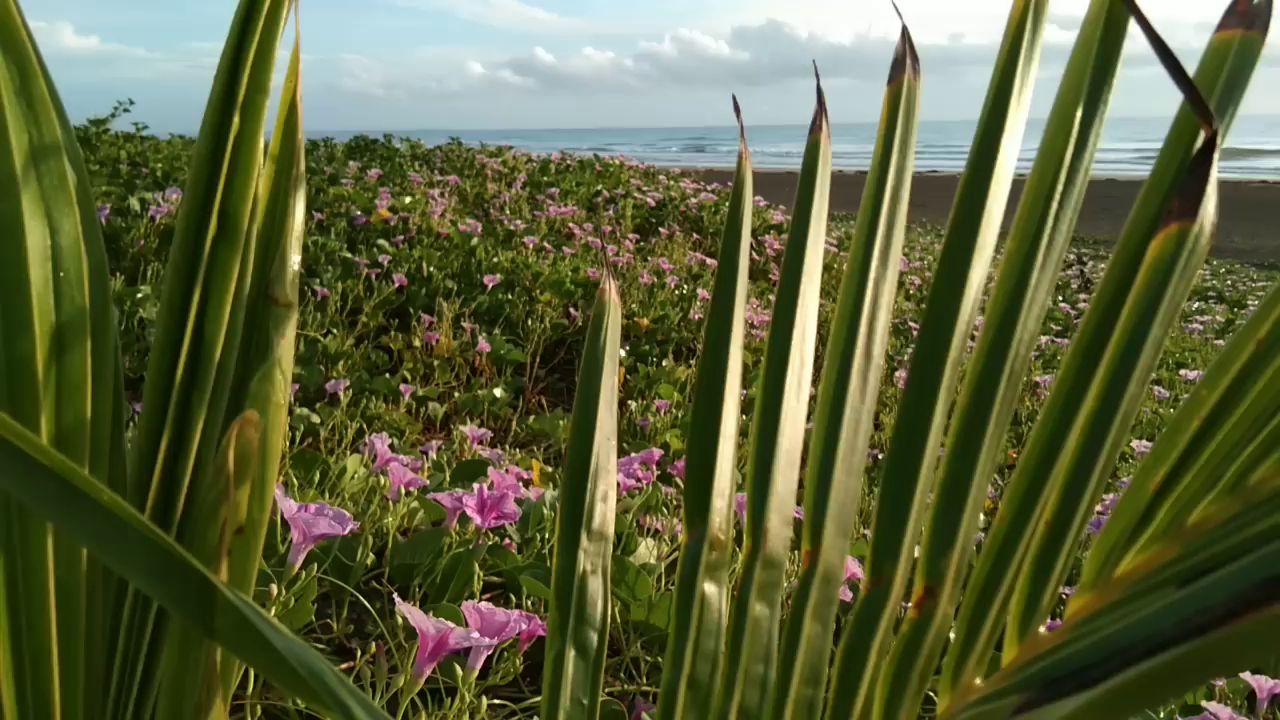

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

def detect_and_display_hard_cuts(input_video_path):
    cap = cv2.VideoCapture(input_video_path)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    prev_frame = None
    displayed = False
    hard_cut_detected = False

    for frame_index in range(frame_count):
        ret, frame = cap.read()

        if not ret:
            break

        if prev_frame is not None:
            # Compute the absolute difference between the current frame and the previous frame
            frame_diff = cv2.absdiff(frame, prev_frame)
            diff_score = frame_diff.sum()

            # Define a threshold to determine hard cuts (you can adjust this value)
            threshold = 100

            if diff_score > threshold:
                if not hard_cut_detected:
                    hard_cut_detected = True
                    displayed = False
                    print(f"Hard Cut Detected at Frame {frame_index}")
            else:
                hard_cut_detected = False

            if hard_cut_detected and not displayed:
                cv2_imshow(frame)
                displayed = True

        prev_frame = frame.copy()

    cap.release()

    cv2.destroyAllWindows()

if __name__ == "__main__":
    input_video_path = '/content/nature.mp4'  # Replace with your video file

    detect_and_display_hard_cuts(input_video_path)
